## Business Objective 3

Customers Segmentation of It consists of the number of customers who churn out. Derive insights and get possible information on factors that may affect the churn decision.  This would lead to customer retention and higher profits.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
sns.set()

### Data Dictionary

In [3]:
telco = pd.read_excel('Telco_customer_churn.xlsx')

### Exploratory Data Analysis

In [4]:
telco.sample(5)

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
4844,9501-UKKNL,1,Q3,No,0,59,None,No,0.00,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,51.70,3005.80,0.0,0,0.00,3005.80
1676,1569-TTNYJ,1,Q3,Yes,1,5,None,Yes,1.16,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,78.75,412.10,0.0,10,5.80,427.90
845,4334-HOWRP,1,Q3,Yes,1,72,Offer A,No,0.00,No,...,No,Two Year,Yes,Credit Card,64.95,4546.00,0.0,30,0.00,4576.00
4080,6619-RPLQZ,1,Q3,Yes,2,45,Offer B,Yes,40.19,No,...,No,Two Year,No,Mailed Check,20.85,892.15,0.0,0,1808.55,2700.70
1548,3074-GQWYX,1,Q3,No,0,5,None,Yes,46.88,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,75.90,357.75,0.0,0,234.40,592.15


In [5]:
telco.shape

(7043, 30)

In [6]:
telco.var()

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_2296/781160484.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  telco.var()


Count                                0.000000e+00
Number of Referrals                  9.007197e+00
Tenure in Months                     6.023128e+02
Avg Monthly Long Distance Charges    2.386442e+02
Avg Monthly GB Download              4.169331e+02
Monthly Charge                       9.054109e+02
Total Charges                        5.135755e+06
Total Refunds                        6.245131e+01
Total Extra Data Charges             6.302599e+02
Total Long Distance Charges          7.168332e+05
Total Revenue                        8.209397e+06
dtype: float64

In [7]:
#remove zero variance columns and customer ID
telco1 = telco.drop(['Count','Customer ID'],axis=1)

In [8]:
telco1.sample(5)

,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
2928,Q3,Yes,1,38,None,Yes,22.05,No,Yes,Cable,...,Yes,Two Year,No,Credit Card,81.00,3084.90,0.0,0,837.90,3922.80
4321,Q3,No,0,13,None,Yes,42.62,No,Yes,Fiber Optic,...,Yes,One Year,Yes,Credit Card,74.65,966.25,0.0,0,554.06,1520.31
1478,Q3,No,0,1,Offer E,No,0.00,No,Yes,DSL,...,Yes,Month-to-Month,Yes,Bank Withdrawal,34.70,34.70,0.0,0,0.00,34.70
1257,Q3,No,0,7,Offer E,Yes,16.04,No,No,None,...,No,Month-to-Month,No,Bank Withdrawal,20.00,137.60,0.0,0,112.28,249.88
5873,Q3,Yes,1,68,Offer A,Yes,7.87,Yes,Yes,Fiber Optic,...,Yes,Two Year,Yes,Bank Withdrawal,84.70,5711.05,0.0,0,535.16,6246.21


In [9]:
telco1.shape

(7043, 28)

In [10]:
telco1.sample(3)

,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
3622,Q3,No,0,42,None,Yes,23.25,No,No,None,...,No,One Year,Yes,Credit Card,20.65,958.1,0.0,0,976.50,1934.60
1525,Q3,No,0,3,Offer E,Yes,32.43,No,Yes,Fiber Optic,...,Yes,Month-to-Month,Yes,Bank Withdrawal,79.10,246.5,0.0,0,97.29,343.79
3772,Q3,No,0,1,None,Yes,42.15,No,No,None,...,No,Month-to-Month,No,Mailed Check,20.20,20.2,0.0,0,42.15,62.35


In [11]:
telco1.columns

Index(['Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [12]:
telco1.isnull().sum()

Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges 

Imputation not needed

In [13]:
telco1.duplicated().sum()

0

In [14]:
#remove zero variance column Quarter 
telco1.drop(['Quarter'],axis=1,inplace=True)

In [15]:
telco1.shape

(7043, 27)

In [16]:
numeric_col= ['Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges','Avg Monthly GB Download',
        'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue']
nominal_col= ['Referred a Friend','Offer','Phone Service','Multiple Lines','Internet Service',
              'Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support',
              'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing',
             'Payment Method']


In [17]:
telco1_num = telco1[numeric_col]

In [18]:
telco1_num.sample(2)

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
4736,0,31,31.79,0,20.95,683.25,0.0,0,985.49,1668.74
7019,0,26,0.00,47,35.75,1022.50,0.0,0,0.00,1022.50


In [19]:
telco1_cat = telco1[nominal_col]

In [20]:
telco1_cat.sample(2)

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
2039,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,No,Yes,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal
1436,No,None,Yes,Yes,Yes,Fiber Optic,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal


In [21]:
telco1_cat.shape

(7043, 17)

In [22]:
telco1_num.shape

(7043, 10)

#### Univariate analysis

##### Moments

In [23]:
telco1_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Referrals,7043.0,1.951867,3.001199,0.00,0.000,0.00,3.000,11.00
Tenure in Months,7043.0,32.386767,24.542061,1.00,9.000,29.00,55.000,72.00
Avg Monthly Long Distance Charges,7043.0,22.958954,15.448113,0.00,9.210,22.89,36.395,49.99
Avg Monthly GB Download,7043.0,20.515405,20.418940,0.00,3.000,17.00,27.000,85.00
Monthly Charge,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.850,118.75
Total Charges,7043.0,2280.381264,2266.220462,18.80,400.150,1394.55,3786.600,8684.80
Total Refunds,7043.0,1.962182,7.902614,0.00,0.000,0.00,0.000,49.79
Total Extra Data Charges,7043.0,6.860713,25.104978,0.00,0.000,0.00,0.000,150.00
Total Long Distance Charges,7043.0,749.099262,846.660055,0.00,70.545,401.44,1191.100,3564.72
Total Revenue,7043.0,3034.379056,2865.204542,21.36,605.610,2108.64,4801.145,11979.34


we can see that the mean has varied range. We would want to Normalize the data.

In [24]:
#Fisher's Kurtosis
telco1_num.kurt(axis=0)

Number of Referrals                   0.721964
Tenure in Months                     -1.387052
Avg Monthly Long Distance Charges    -1.254654
Avg Monthly GB Download               0.881502
Monthly Charge                       -1.257260
Total Charges                        -0.227693
Total Refunds                        18.350658
Total Extra Data Charges             16.458874
Total Long Distance Charges           0.644092
Total Revenue                        -0.203457
dtype: float64

In [25]:
#skew
telco1_num.skew(axis=0)

Number of Referrals                  1.446060
Tenure in Months                     0.240543
Avg Monthly Long Distance Charges    0.049176
Avg Monthly GB Download              1.216584
Monthly Charge                      -0.220524
Total Charges                        0.963791
Total Refunds                        4.328517
Total Extra Data Charges             4.091209
Total Long Distance Charges          1.238282
Total Revenue                        0.919410
dtype: float64

##### Distributions

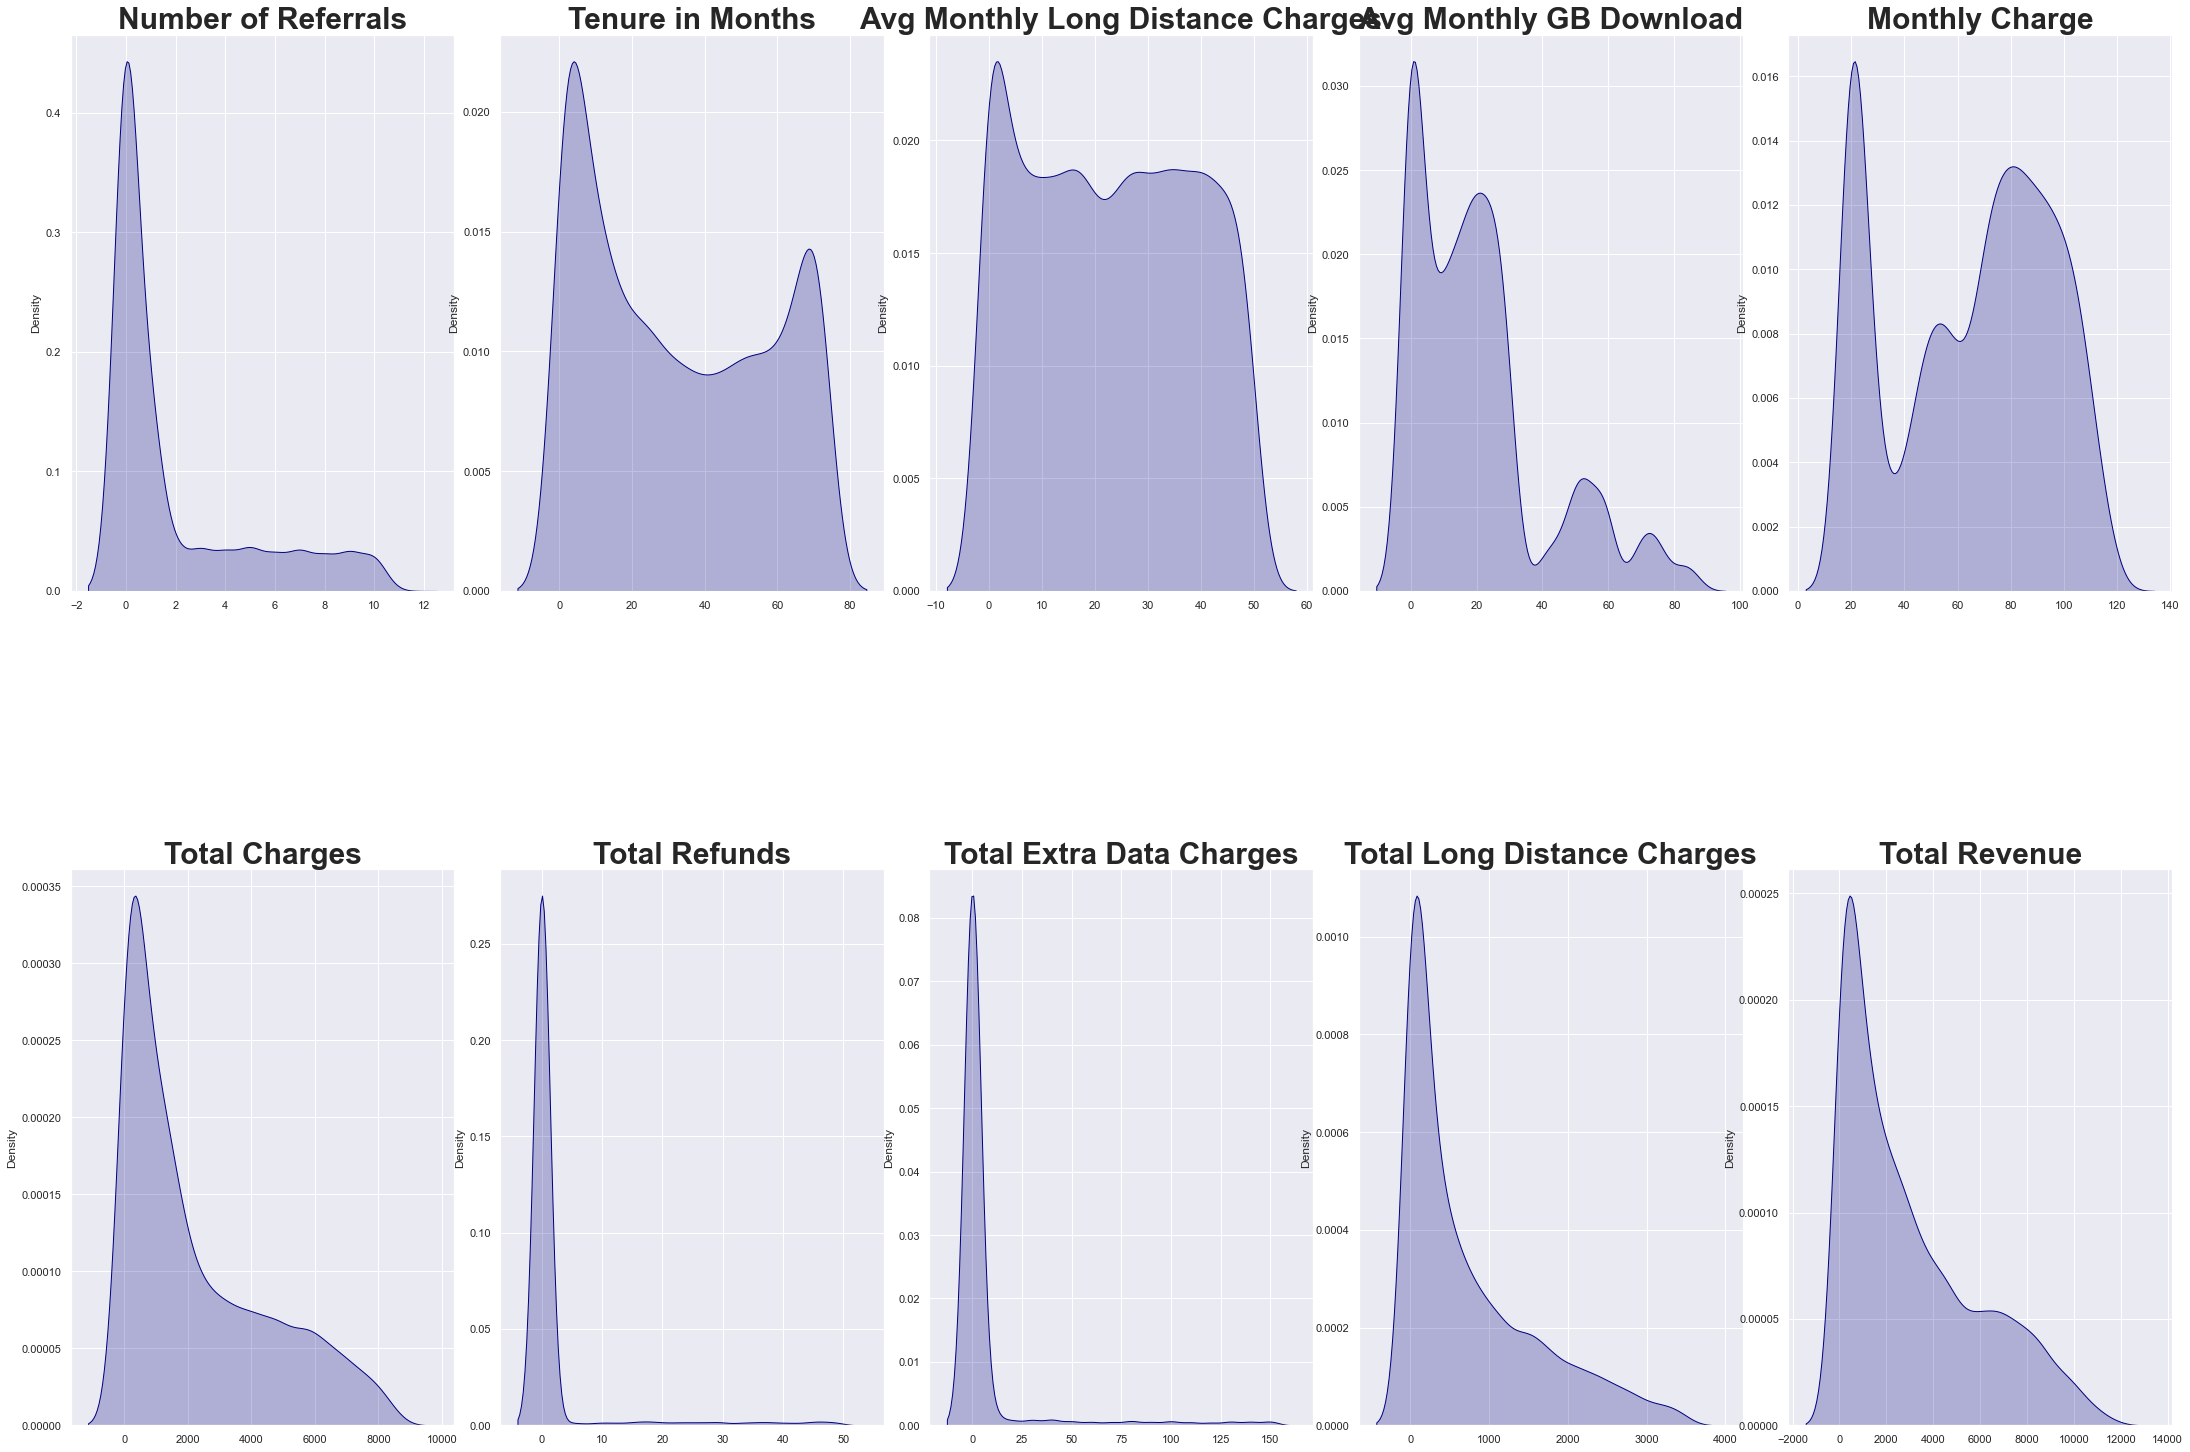

In [26]:
#display distributions for numeric data
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(30,20))
fig.tight_layout()
#cols = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance','Flight_miles_12mo','Qual_miles']
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[0,4],axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[1,4]]
j=0
for col in telco1_num.columns:
    p= sns.kdeplot(data=telco1_num, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

**Observations:**  
    * all  are right skewed  except monthly charge  
    * Total Refunds &  Total Extra Data Charges are leptokurtic.  
    * 'tenure in months', is bimodal    
    * Let's check the QQ plot for these columns  

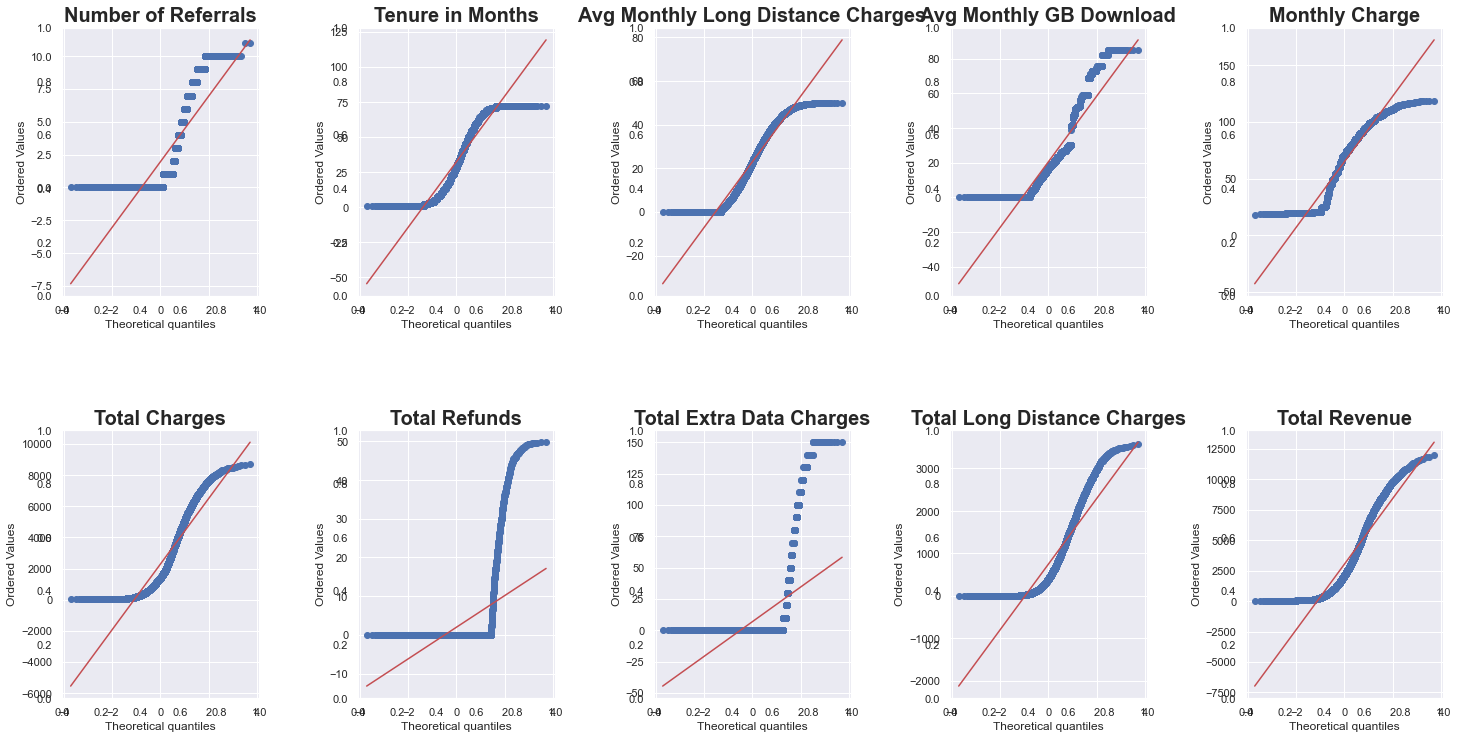

In [27]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
#cols = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance','Flight_miles_12mo','Qual_miles']
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10]
j=0

for col in telco1_num.columns:
    ax = fig.add_subplot(2, 5, nfig[j])
    p=stats.probplot(telco1_num[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1


**Observations:**  
    * All columns are not normally distributed   
    * We will apply 'yeo-johnson' PowerTransformer on the non gaussian features when we create pipeline. 

In [28]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [29]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(telco1_num)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,column,stat,p,Distribution
0,Number of Referrals,0.689840,0.0,Not Gaussian
1,Tenure in Months,0.903632,0.0,Not Gaussian
2,Avg Monthly Long Distance Charges,0.942442,0.0,Not Gaussian
3,Avg Monthly GB Download,0.858070,0.0,Not Gaussian
4,Monthly Charge,0.920890,0.0,Not Gaussian
5,Total Charges,0.860029,0.0,Not Gaussian
6,Total Refunds,0.266815,0.0,Not Gaussian
7,Total Extra Data Charges,0.301912,0.0,Not Gaussian
8,Total Long Distance Charges,0.827521,0.0,Not Gaussian
9,Total Revenue,0.880111,0.0,Not Gaussian


##### Outlier Treatment

In [30]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
telco1_norm= pd.DataFrame(scalerMM.fit_transform(telco1_num))
telco1_norm.columns=telco1_num.columns


In [31]:
telco1_norm.sample(4)

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
4597,0.000000,0.690141,0.969194,0.164706,0.610448,0.462197,0.000000,0.0,0.679577,0.537327
5104,0.000000,0.098592,0.000000,0.600000,0.201493,0.036003,0.000000,0.0,0.000000,0.025877
6507,0.090909,0.253521,0.637127,0.000000,0.018905,0.042569,0.059651,0.0,0.169761,0.080994
464,0.000000,0.169014,0.089018,0.294118,0.634328,0.127902,0.000000,0.0,0.016228,0.097315


<AxesSubplot:>

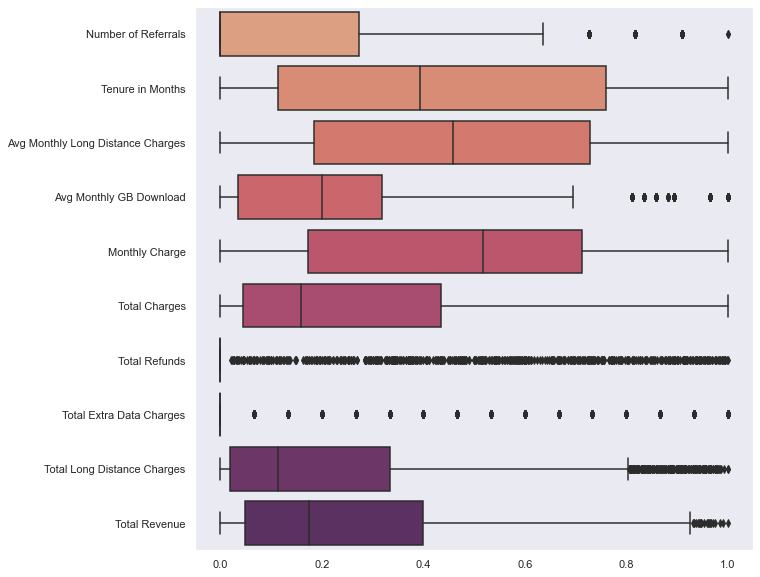

In [32]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.boxplot(data=telco1_norm, orient="h", palette = 'flare')

In [33]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [34]:
#get outliers from all numeric features
IQR_Outliers(telco1_num, telco1_num.columns)

Number of samples:  7043

Number of rows with outliers:  2145


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,Number of Referrals,676,9.60,7.5000,-4.5000
1,Tenure in Months,0,0.00,124.0000,-60.0000
2,Avg Monthly Long Distance Charges,0,0.00,77.1725,-31.5675
3,Avg Monthly GB Download,362,5.14,63.0000,-33.0000
4,Monthly Charge,0,0.00,171.3750,-46.0250
5,Total Charges,0,0.00,8866.2750,-4679.5250
6,Total Refunds,525,7.45,0.0000,0.0000
7,Total Extra Data Charges,728,10.34,0.0000,0.0000
8,Total Long Distance Charges,196,2.78,2871.9325,-1610.2875
9,Total Revenue,21,0.30,11094.4475,-5687.6925


lets analyze the 5 columns containing outliers

In [35]:
telco1_num['Number of Referrals'].value_counts()

0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: Number of Referrals, dtype: int64

Number of Referrals outliers are 676 .  We will loose data based on the distribution above. Majority are zero values. no outlier treatment needed.

In [36]:
telco1_num['Total Extra Data Charges'].value_counts()

0      6315
10      138
40       62
30       58
20       51
80       47
100      44
50       43
150      42
130      40
140      38
60       36
90       35
70       34
110      32
120      28
Name: Total Extra Data Charges, dtype: int64

Total Extra Data Charges outliers are 728 . We will loose data based on the distribution above. no outlier treatment needed.

In [37]:
telco1_num['Avg Monthly GB Download'].value_counts()

0     1526
19     220
27     199
30     193
59     192
26     191
23     179
22     172
21     171
18     164
13     164
17     155
16     155
20     151
24     148
28     147
11     145
12     143
29     138
15     132
10     132
14     131
25     130
3      130
4      129
52     121
8      120
9      116
2      116
7      116
5      114
6      114
51      90
53      88
48      86
73      81
69      75
41      67
76      58
85      48
58      45
42      45
82      43
71      42
47      36
57      34
46      19
56      16
75      15
39       1
Name: Avg Monthly GB Download, dtype: int64

Majority are zero values. Other values are sparse. outlier treatmentwill trim the non zero data. Hence no outlier treatment needed

In [38]:
telco1_num['Total Refunds'].value_counts()

0.00     6518
46.06       2
9.73        2
32.55       2
27.60       2
         ... 
36.61       1
34.09       1
44.16       1
27.30       1
27.24       1
Name: Total Refunds, Length: 500, dtype: int64

Majority are zero values. Other values are sparse. outlier treatmentwill trim the non zero data. Hence no outlier treatment needed

In [39]:
telco1_num['Total Long Distance Charges'].value_counts()

0.00       682
22.86        4
48.96        4
177.12       3
15.28        3
          ... 
100.17       1
64.06        1
17.37        1
122.37       1
2043.36      1
Name: Total Long Distance Charges, Length: 6110, dtype: int64

Majority are zero values. Other values are sparse. outlier treatmentwill trim the non zero data. Hence no outlier treatment needed

In [40]:
telco1_num['Total Revenue'].value_counts()

66.56      3
68.41      3
24.80      3
300.80     2
343.68     2
          ..
435.90     1
5478.44    1
118.50     1
845.26     1
8887.86    1
Name: Total Revenue, Length: 6996, dtype: int64

<AxesSubplot:xlabel='Total Revenue', ylabel='Count'>

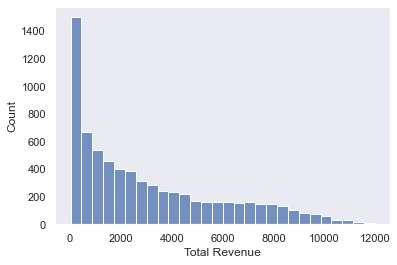

In [41]:
sns.histplot(data=telco1_num, x='Total Revenue')

we will normalize the data,no outlier treatment needed

##### Categorical features

In [42]:
telco1_cat.sample(2)

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
6881,No,None,Yes,No,Yes,Cable,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal
6606,Yes,None,Yes,No,Yes,Fiber Optic,No,Yes,No,Yes,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal


In [43]:
telco1_cat.shape

(7043, 17)

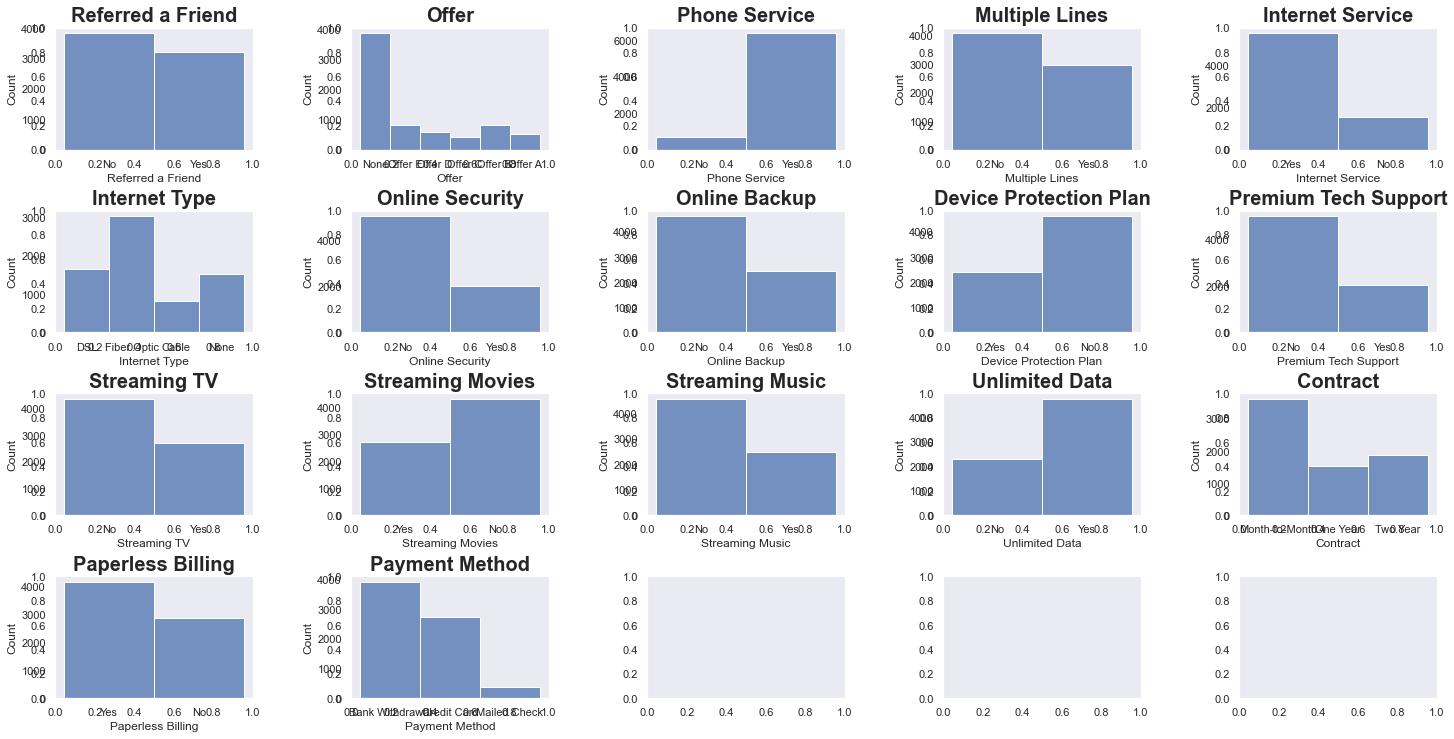

In [44]:
fig, axes = plt.subplots(4, 5, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
j=0

for col in telco1_cat.columns:
    ax = fig.add_subplot(4, 5, nfig[j])
    #p=stats.probplot(telco1_num[col], dist="norm", plot=ax)
    p=sns.histplot(data=telco1_cat, x=col)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1

We will encode these features using OneHotEncoder

### Multivariate Analysis

#### Pair-wise Scatter Plots

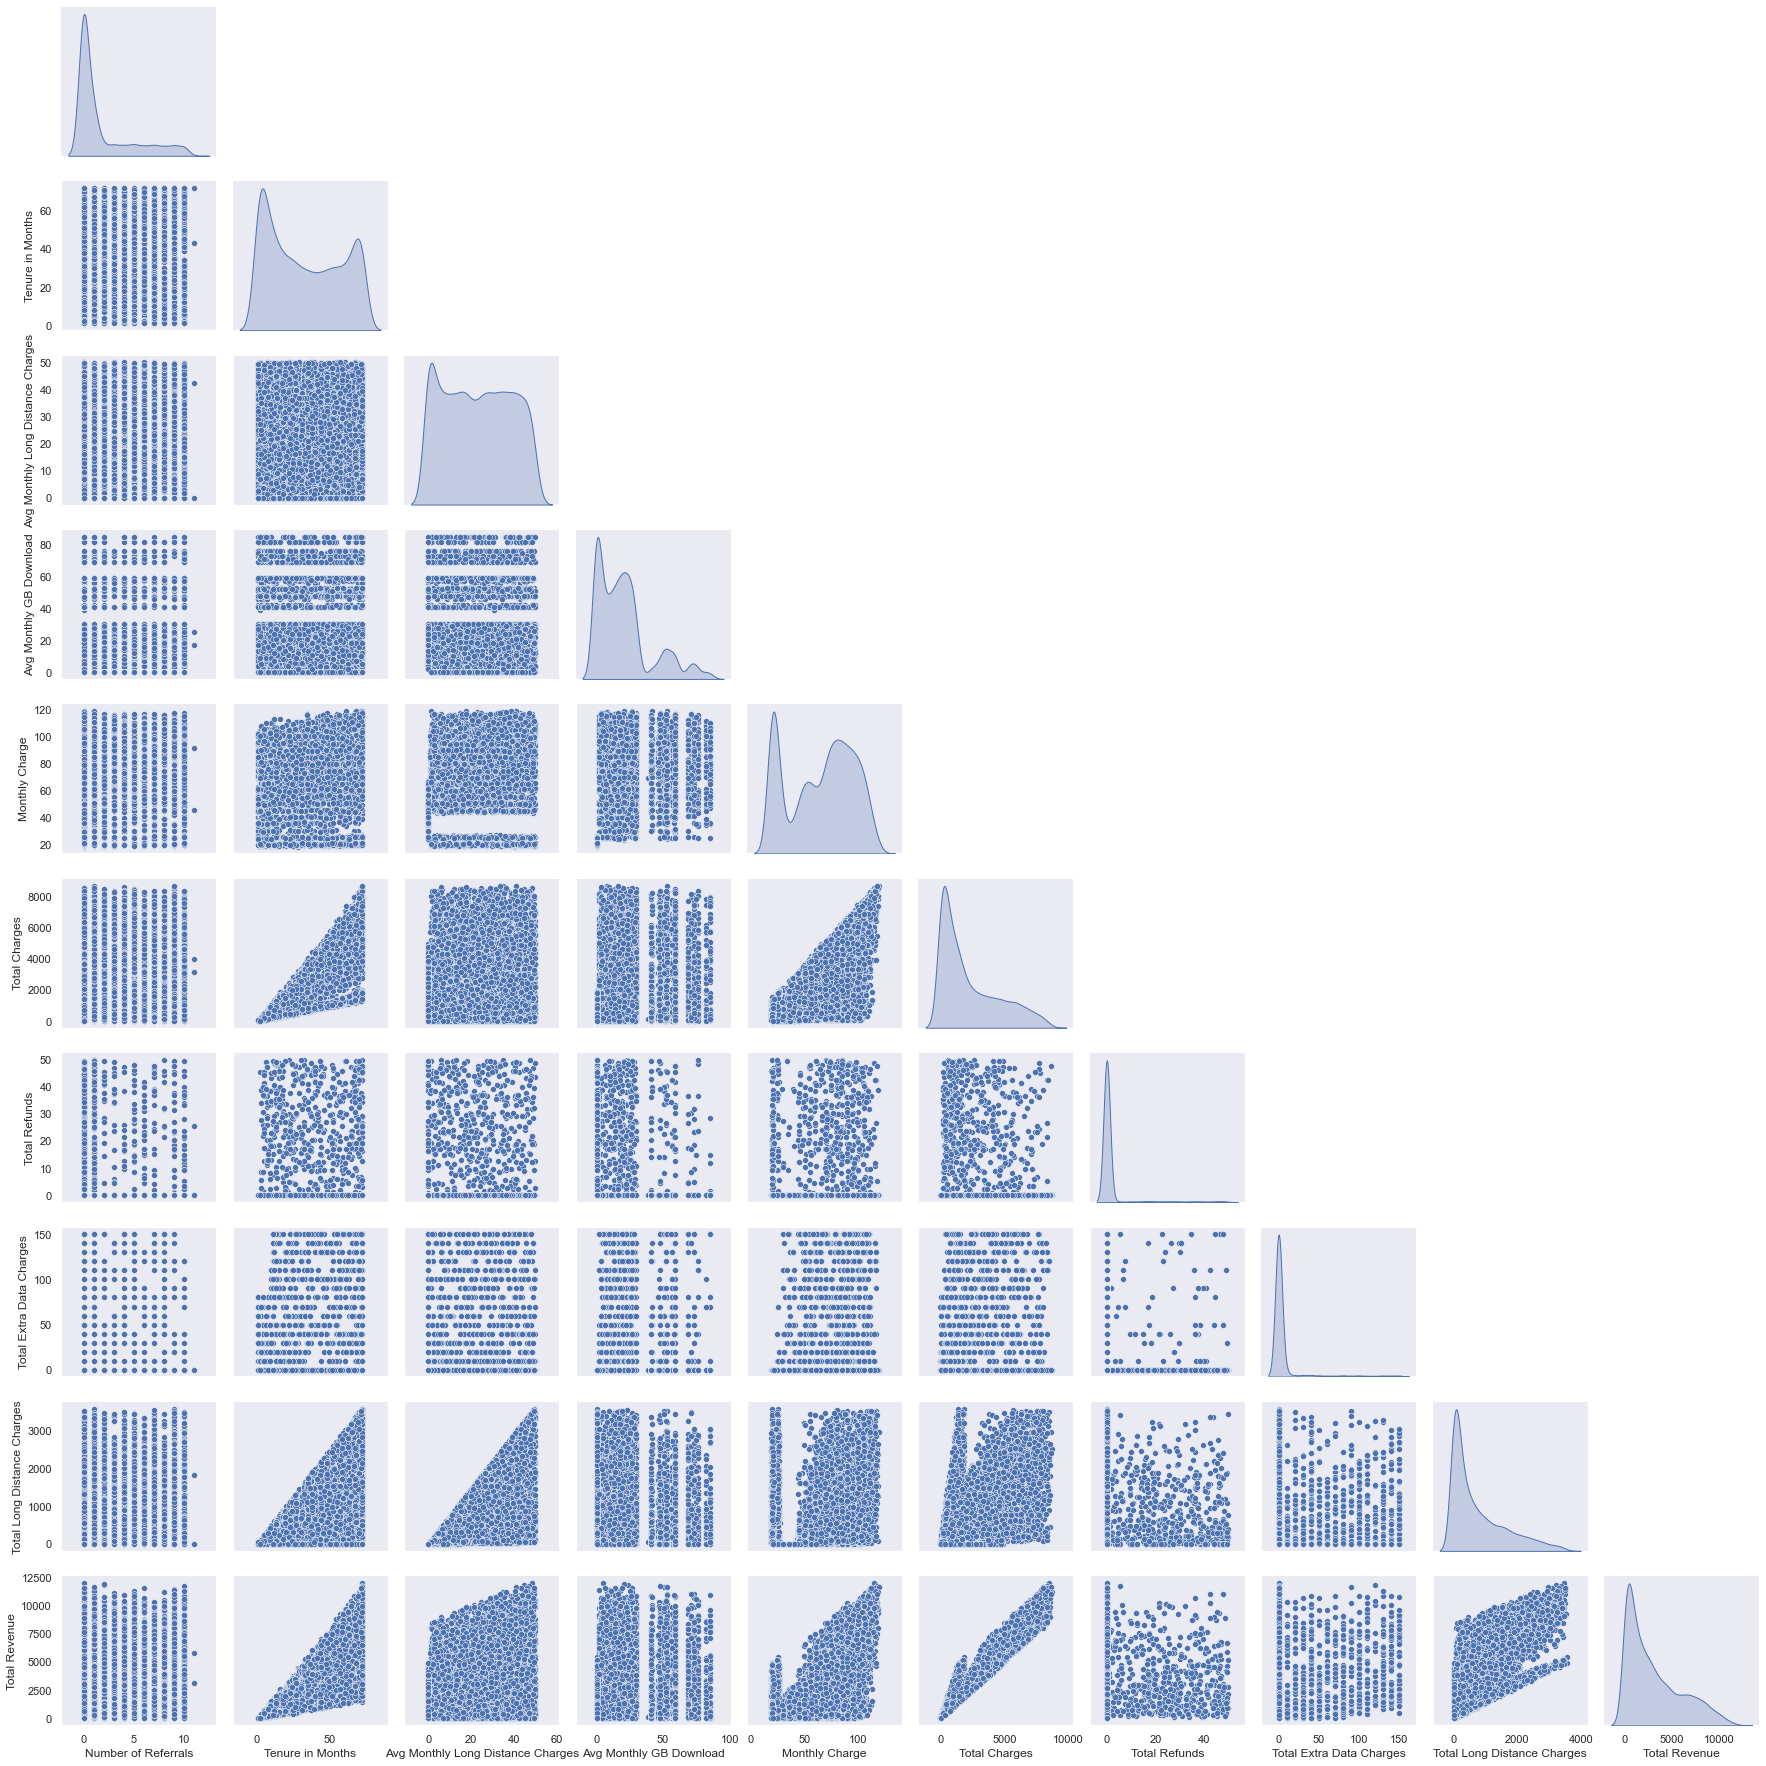

In [45]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20
sns.pairplot(telco1_num,diag_kind="kde", diag_kws=dict(shade=True),corner=True)
#fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

**Observations**  
* 'Total Revenue' and 'Total Charges' have a linear relationship  

In [46]:
telco1_num.columns

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

#### Triangular Heat Map

<AxesSubplot:>

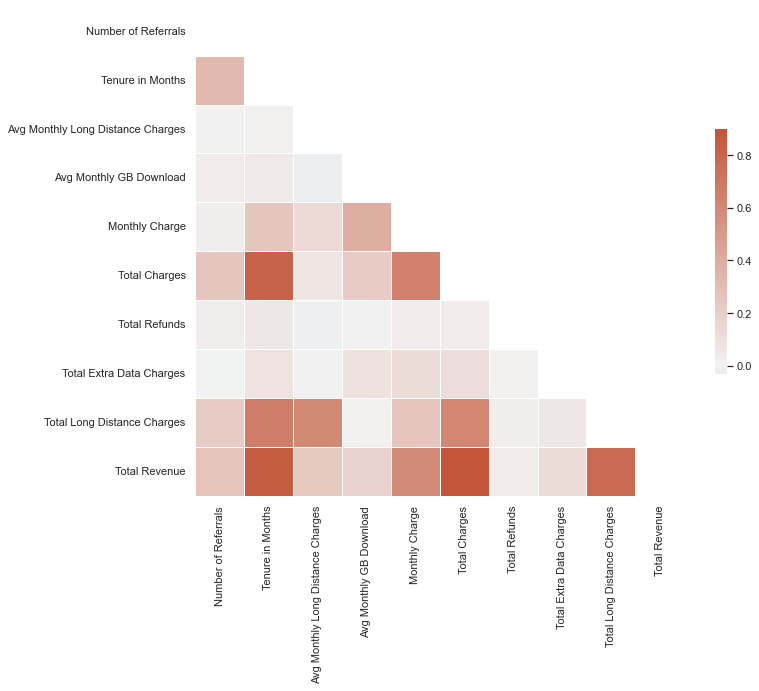

In [47]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(telco1_num.corr(), dtype=bool))

corr= telco1_num.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation matrix

In [48]:
telco1_num.corr(method ='pearson')

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Number of Referrals,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853
Tenure in Months,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291
Avg Monthly GB Download,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726
Monthly Charge,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.033482,0.126244,0.246300,0.588887
Total Charges,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.039558,0.121859,0.610185,0.972212
Total Refunds,0.024756,0.059021,-0.018644,0.002397,0.033482,0.039558,1.000000,0.016755,0.028113,0.036984
Total Extra Data Charges,0.000350,0.082266,0.002414,0.088939,0.126244,0.121859,0.016755,1.000000,0.058871,0.122496
Total Long Distance Charges,0.216190,0.674149,0.599828,0.011373,0.246300,0.610185,0.028113,0.058871,1.000000,0.778559
Total Revenue,0.261853,0.853146,0.232291,0.180726,0.588887,0.972212,0.036984,0.122496,0.778559,1.000000


In [49]:
#Get only highly correlated items

df = telco1_num.corr().abs().round(1)
df = telco1_num.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Number of Referrals,1.0,blah,blah,blah,blah,blah,blah,blah,blah,blah
Tenure in Months,blah,1.0,blah,blah,blah,0.8,blah,blah,0.7,0.9
Avg Monthly Long Distance Charges,blah,blah,1.0,blah,blah,blah,blah,blah,0.6,blah
Avg Monthly GB Download,blah,blah,blah,1.0,blah,blah,blah,blah,blah,blah
Monthly Charge,blah,blah,blah,blah,1.0,0.7,blah,blah,blah,0.6
Total Charges,blah,0.8,blah,blah,0.7,1.0,blah,blah,0.6,1.0
Total Refunds,blah,blah,blah,blah,blah,blah,1.0,blah,blah,blah
Total Extra Data Charges,blah,blah,blah,blah,blah,blah,blah,1.0,blah,blah
Total Long Distance Charges,blah,0.7,0.6,blah,blah,0.6,blah,blah,1.0,0.8
Total Revenue,blah,0.9,blah,blah,0.6,1.0,blah,blah,0.8,1.0


**Observations**  
* We can see that Tenure in Months has very high positive correlation with Total Revenue, Total Charges & Total Long Distance Charges	.


### Data Preprocessing

In [50]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_col= ['Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges','Avg Monthly GB Download',
        'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue']
nominal_col= ['Referred a Friend','Offer','Phone Service','Multiple Lines','Internet Service',
              'Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support',
              'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing',
             'Payment Method']


numeric_transformer = Pipeline(
    steps=[('ptransform',PowerTransformer(method='yeo-johnson', standardize=False)), 
           ('scale',MinMaxScaler())]
)

categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_col),
        ("cat", categorical_transformer, nominal_col),
    ]
)

### Create Preprocessing Pipeline

In [51]:
# We will later Append classifier to preprocessing pipeline.
pipe = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

In [52]:
# Apply the tranformation
telco1_transformed = pipe.fit_transform(telco1) 

In [53]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, telco1.shape, telco1_transformed.shape))

(0, -8)

In [54]:
telco1_transformed.shape

(7043, 35)

In [55]:
telco1.shape

(7043, 27)

In [56]:
# View sample records after transformation
telco1_transformed[0:1,:]

array([[0.        , 0.        , 0.        , 0.33613304, 0.22499522,
        0.05462143, 0.        , 0.99948649, 0.        , 0.06523   ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]])

In [57]:
# View Tranformation steps
pipe.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('ptransform',
                                                   PowerTransformer(standardize=False)),
                                                  ('scale', MinMaxScaler())]),
                                  ['Number of Referrals', 'Tenure in Months',
                                   'Avg Monthly Long Distance Charges',
                                   'Avg Monthly GB Download', 'Monthly Charge',
                                   'Total Charges', 'Total Refunds',
                                   'Total Extra Data Charges',
                                   'Total Long Distance Charges',
                                   'Total Revenue']),
                                 ('cat', OneHotEncoder(drop='first'),
                                  ['Referred a Friend', 'Offer', 'Phone Service',
                                   'Multiple Lines', 'Internet Service',
   

### Model Building

#### Agglomerative Clustering

##### View Dendrogram

In [58]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

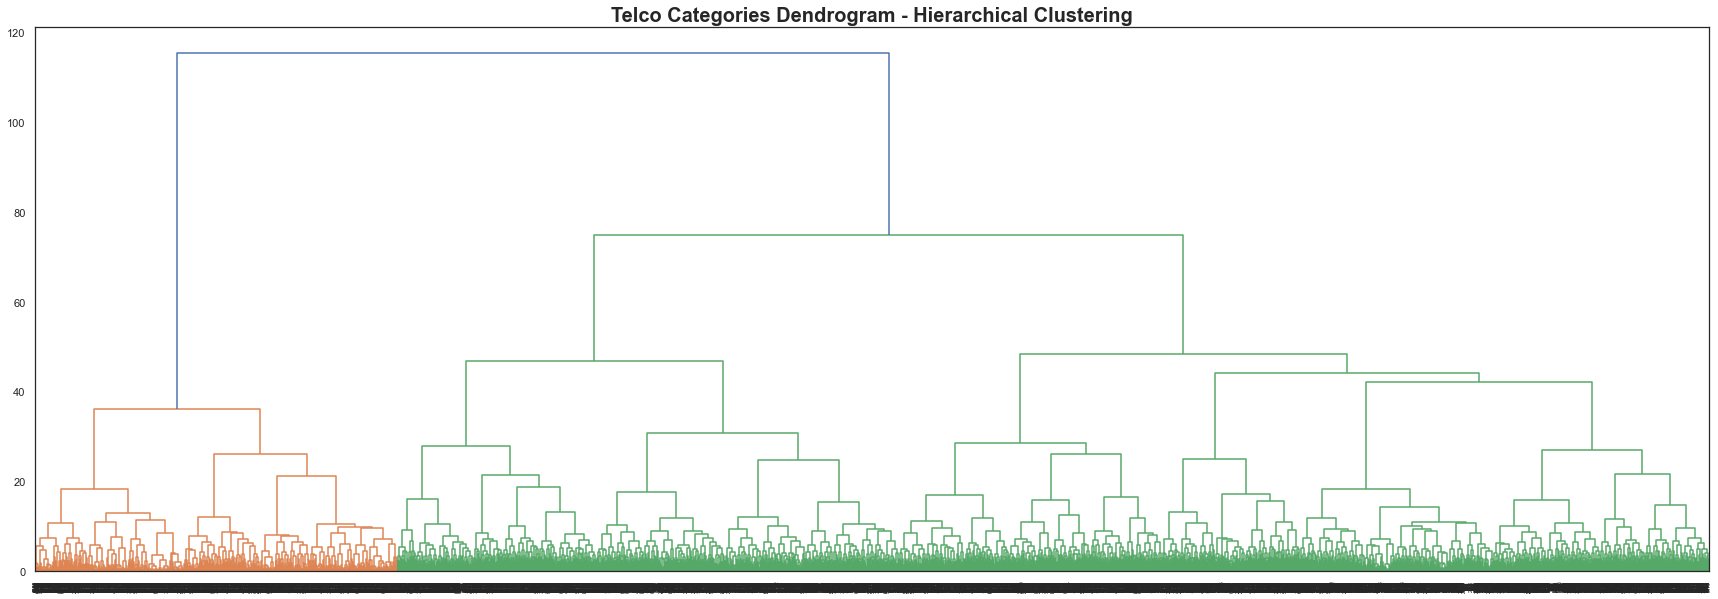

In [59]:
Z = linkage(telco1_transformed, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Telco Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [60]:
#Function to plot truncated dendrogram
def plot_dendrogram(model, **kwargs):
  
    count = np.zeros(model.children_.shape[0])
    nsamples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        currentcount = 0
        for child_idx in merge:
            if child_idx < nsamples:
                currentcount += 1  
            else:
                currentcount += count[child_idx - nsamples]
        count[i] = currentcount

    linkagematrix = np.column_stack(
        [model.children_, model.distances_, count]
    ).astype(float)
    dendrogram(linkagematrix, **kwargs)    

##### Evaluate with Hyperparameters

We will evaluate the clustering fit based on the scores below, by tuning hyperparameters - number of clusters and Linkage.

###### Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

(Reference : https://scikit-learn.org/)

* **The Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance    (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between     a sample and the nearest cluster that sample is not part of    
* **Calinski Harabasz Score** The score is defined as ratio between the within-cluster dispersion and the between-cluster            dispersion  
* **Davies Bouldin Score** The score is defined as the average similarity measure of each cluster with its most similar             cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are       farther apart and less dispersed will result in a better score.    
* **Cophenetic Correlation Coefficient:** If the cluster is good then the linking of objects in the cluster tree should have a     strong correlation with the distances between objects in the distance vector.

In [61]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Defining a function to find the optimal number of clusters' n_clusters parameter
# Note that we are using a dataset that contains only numeric features. 

def agglomerationScorecard(transformed_df):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    cal_har_scores =[]
    dav_boulds =[]
    clusters=[]
    linkages1 = []
    totals = []
    cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:                      
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(transformed_df)
            silhouette_avg = silhouette_score(transformed_df, labels_)
            cal_har_score = calinski_harabasz_score(transformed_df, labels_)
            dav_bould = davies_bouldin_score(transformed_df, labels_) 
            Z = linkage(transformed_df, method = link, metric = 'euclidean')
            cophenetic, coph_dists = cophenet(Z, pdist(transformed_df))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            cal_har_scores.append(cal_har_score)
            dav_boulds.append(dav_bould)
            totals.append(silhouette_avg + cal_har_score + dav_bould )
            cophenetics.append(cophenetic) 
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    scorecard['calinski_harabasz'] =cal_har_scores
    scorecard['davies_bouldin']  = dav_boulds
    scorecard['Total']  = totals
    scorecard['cophenetic']  = cophenetics
    return scorecard

In [62]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(telco1_transformed)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

,clusters,linkage,silhouette,calinski_harabasz,davies_bouldin,Total,cophenetic
0,2,ward,0.182129,1509.568117,1.578183,1511.328428,0.561921
1,2,average,0.144504,1280.138425,2.324355,1282.607284,0.661726
2,3,ward,0.142968,1178.261089,2.461453,1180.865511,0.561921
3,2,complete,0.130354,1098.306118,2.440793,1100.877265,0.592032
4,4,ward,0.134915,920.956010,2.764175,923.855101,0.561921
5,5,ward,0.125104,794.284367,2.726532,797.136003,0.561921
6,3,complete,0.109850,644.707404,2.542184,647.359438,0.592032
7,3,average,0.122285,643.847986,2.182682,646.152953,0.661726
8,4,average,0.111940,544.862590,2.371866,547.346397,0.661726
9,4,complete,0.072268,490.110868,2.746899,492.930036,0.592032


**Observations:**  
* We find the top two records with ward,average linkage with 2 clusters (silhoutte = 0.18).    
We choose  2 clusters based on above results

###### Option 1: Two Clusters

* Silhouette score, calinski_harabasz_score are highest for 2 clusters with ward/average/single linkage.

In [63]:
cluster = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(telco1_transformed)

In [64]:
# Data points spread
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5517],
       [   1, 1526]], dtype=int64)

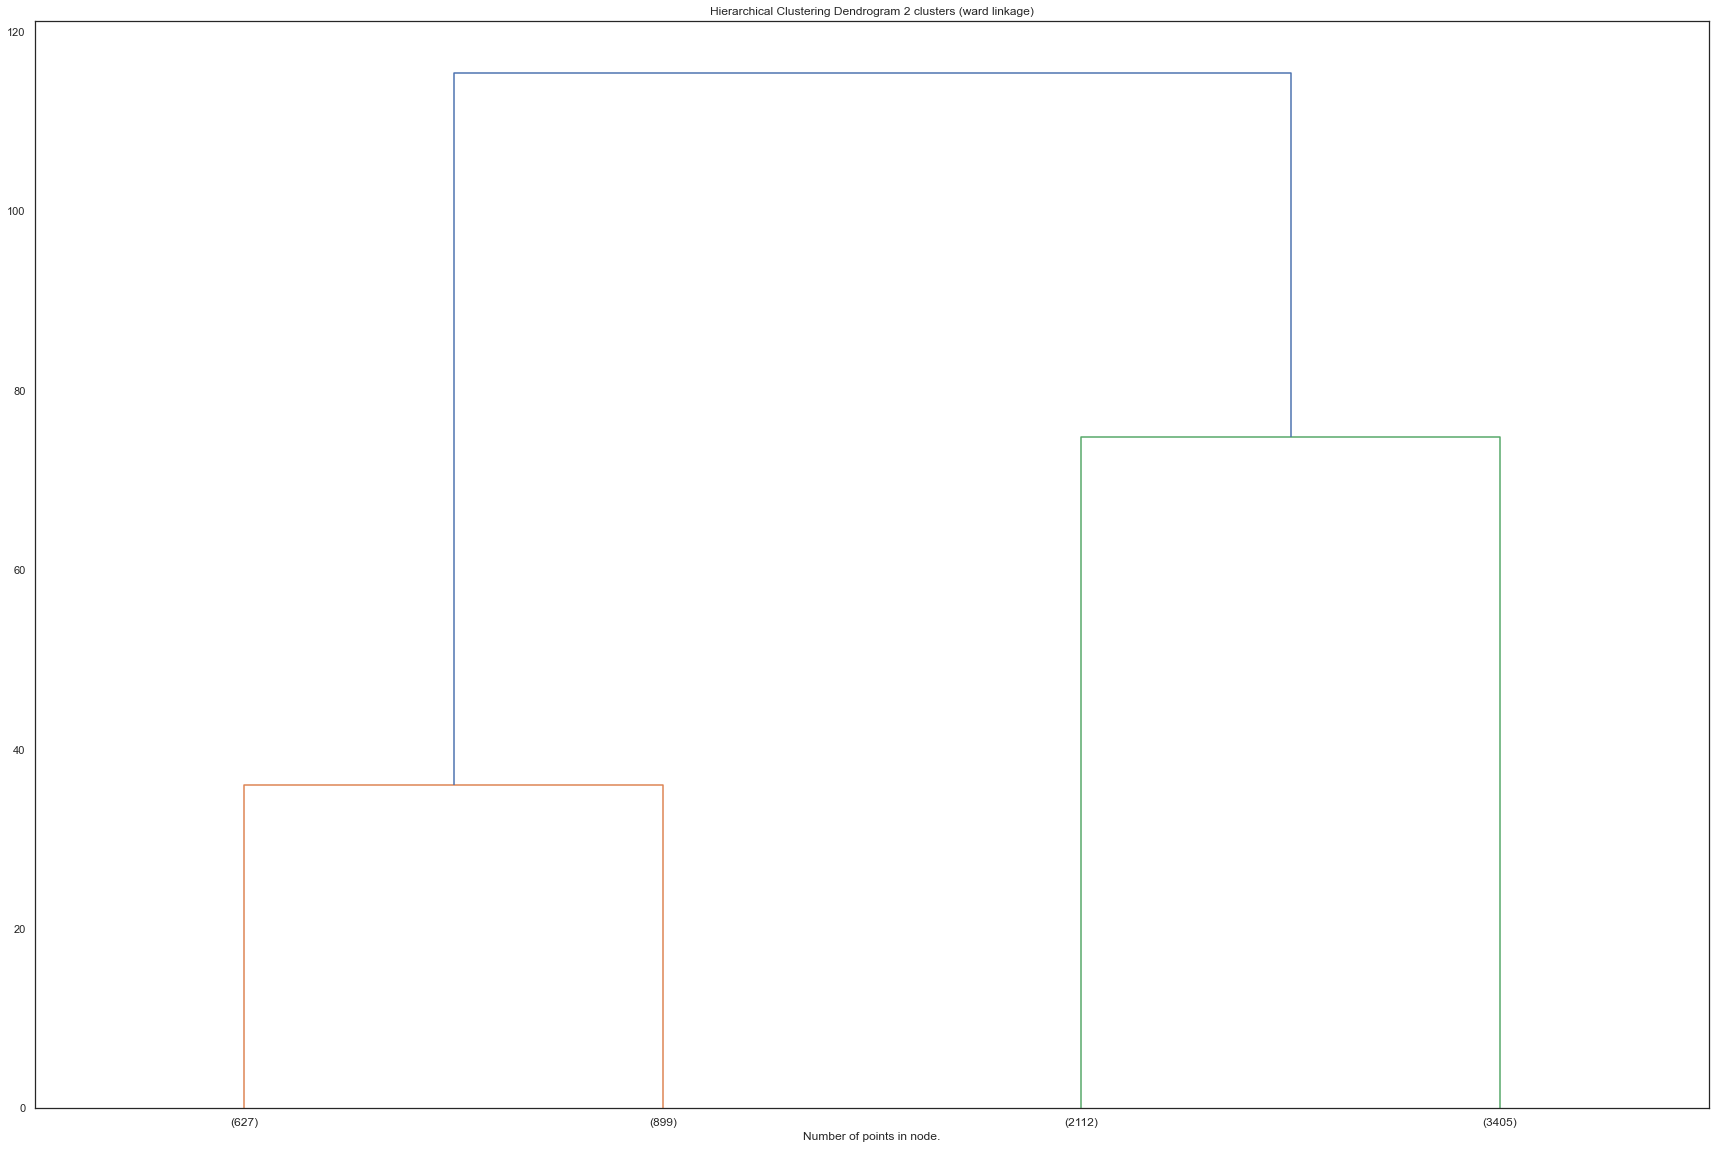

In [66]:
from scipy.cluster.hierarchy import dendrogram
plt.title("Hierarchical Clustering Dendrogram 2 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=1)
plt.xlabel("Number of points in node.")
plt.show()

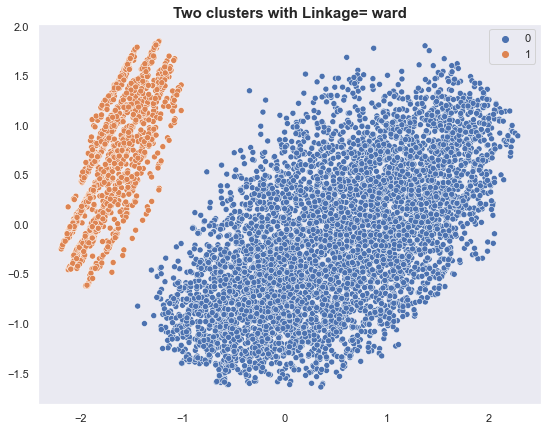

In [67]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=2)
telco_pca = pca.fit_transform(telco1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=telco_pca[:,0], y=telco_pca[:,1],palette="deep")
plt.title("Two clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

### Benefits/impact of the solution 

In [68]:
#Link the clusters to original data

cluster_labels = pd.Series(cluster.labels_)
telco['cluster'] = cluster_labels # creating a new column and assigning it to new column

In [69]:
telco

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,cluster
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,0
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,0
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,0
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,0
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,No,...,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53,1
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,...,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47,0
7040,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,Yes,...,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04,0
7041,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21,0


In [70]:
telco.groupby('cluster').size()

cluster
0    5517
1    1526
dtype: int64

In [71]:
#airline1.groupby('cluster', as_index=False)['Bonus_trans','Bonus_miles'].mean()
telco.groupby('cluster').mean()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
cluster,,,,,,,,,,,
0,1.0,1.890339,32.884720,22.401602,26.189958,76.844254,2727.620228,2.047441,8.758383,743.254149,3477.585320
1,1.0,2.174312,30.586501,24.973965,0.000000,21.079194,663.462936,1.653945,0.000000,770.231298,1432.040288


* Cluster 1 has 1526 customers from whom the company gets only 50% (approx) revenue compared to cluster 0.
* Cluster 1 also has 0 Avg Monthly GB Download and hence also 0 Total Extra Data Charges
* The company can can target cluster 1 customers with attractive data plans which would contribute to total revenue.

In [72]:
#Link the clusters to original data

cluster_labels = pd.Series(cluster.labels_)
telco1_cat['cluster'] = cluster_labels # creating a new column and assigning it to new column


C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_2296/873141855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco1_cat['cluster'] = cluster_labels # creating a new column and assigning it to new column


In [73]:
telco1_cat.sample(2)

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,cluster
1628,No,Offer E,Yes,No,Yes,Fiber Optic,No,Yes,No,Yes,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,0
1257,No,Offer E,Yes,No,No,None,No,No,No,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,1


In [74]:
telco.groupby('cluster').size()

cluster
0    5517
1    1526
dtype: int64

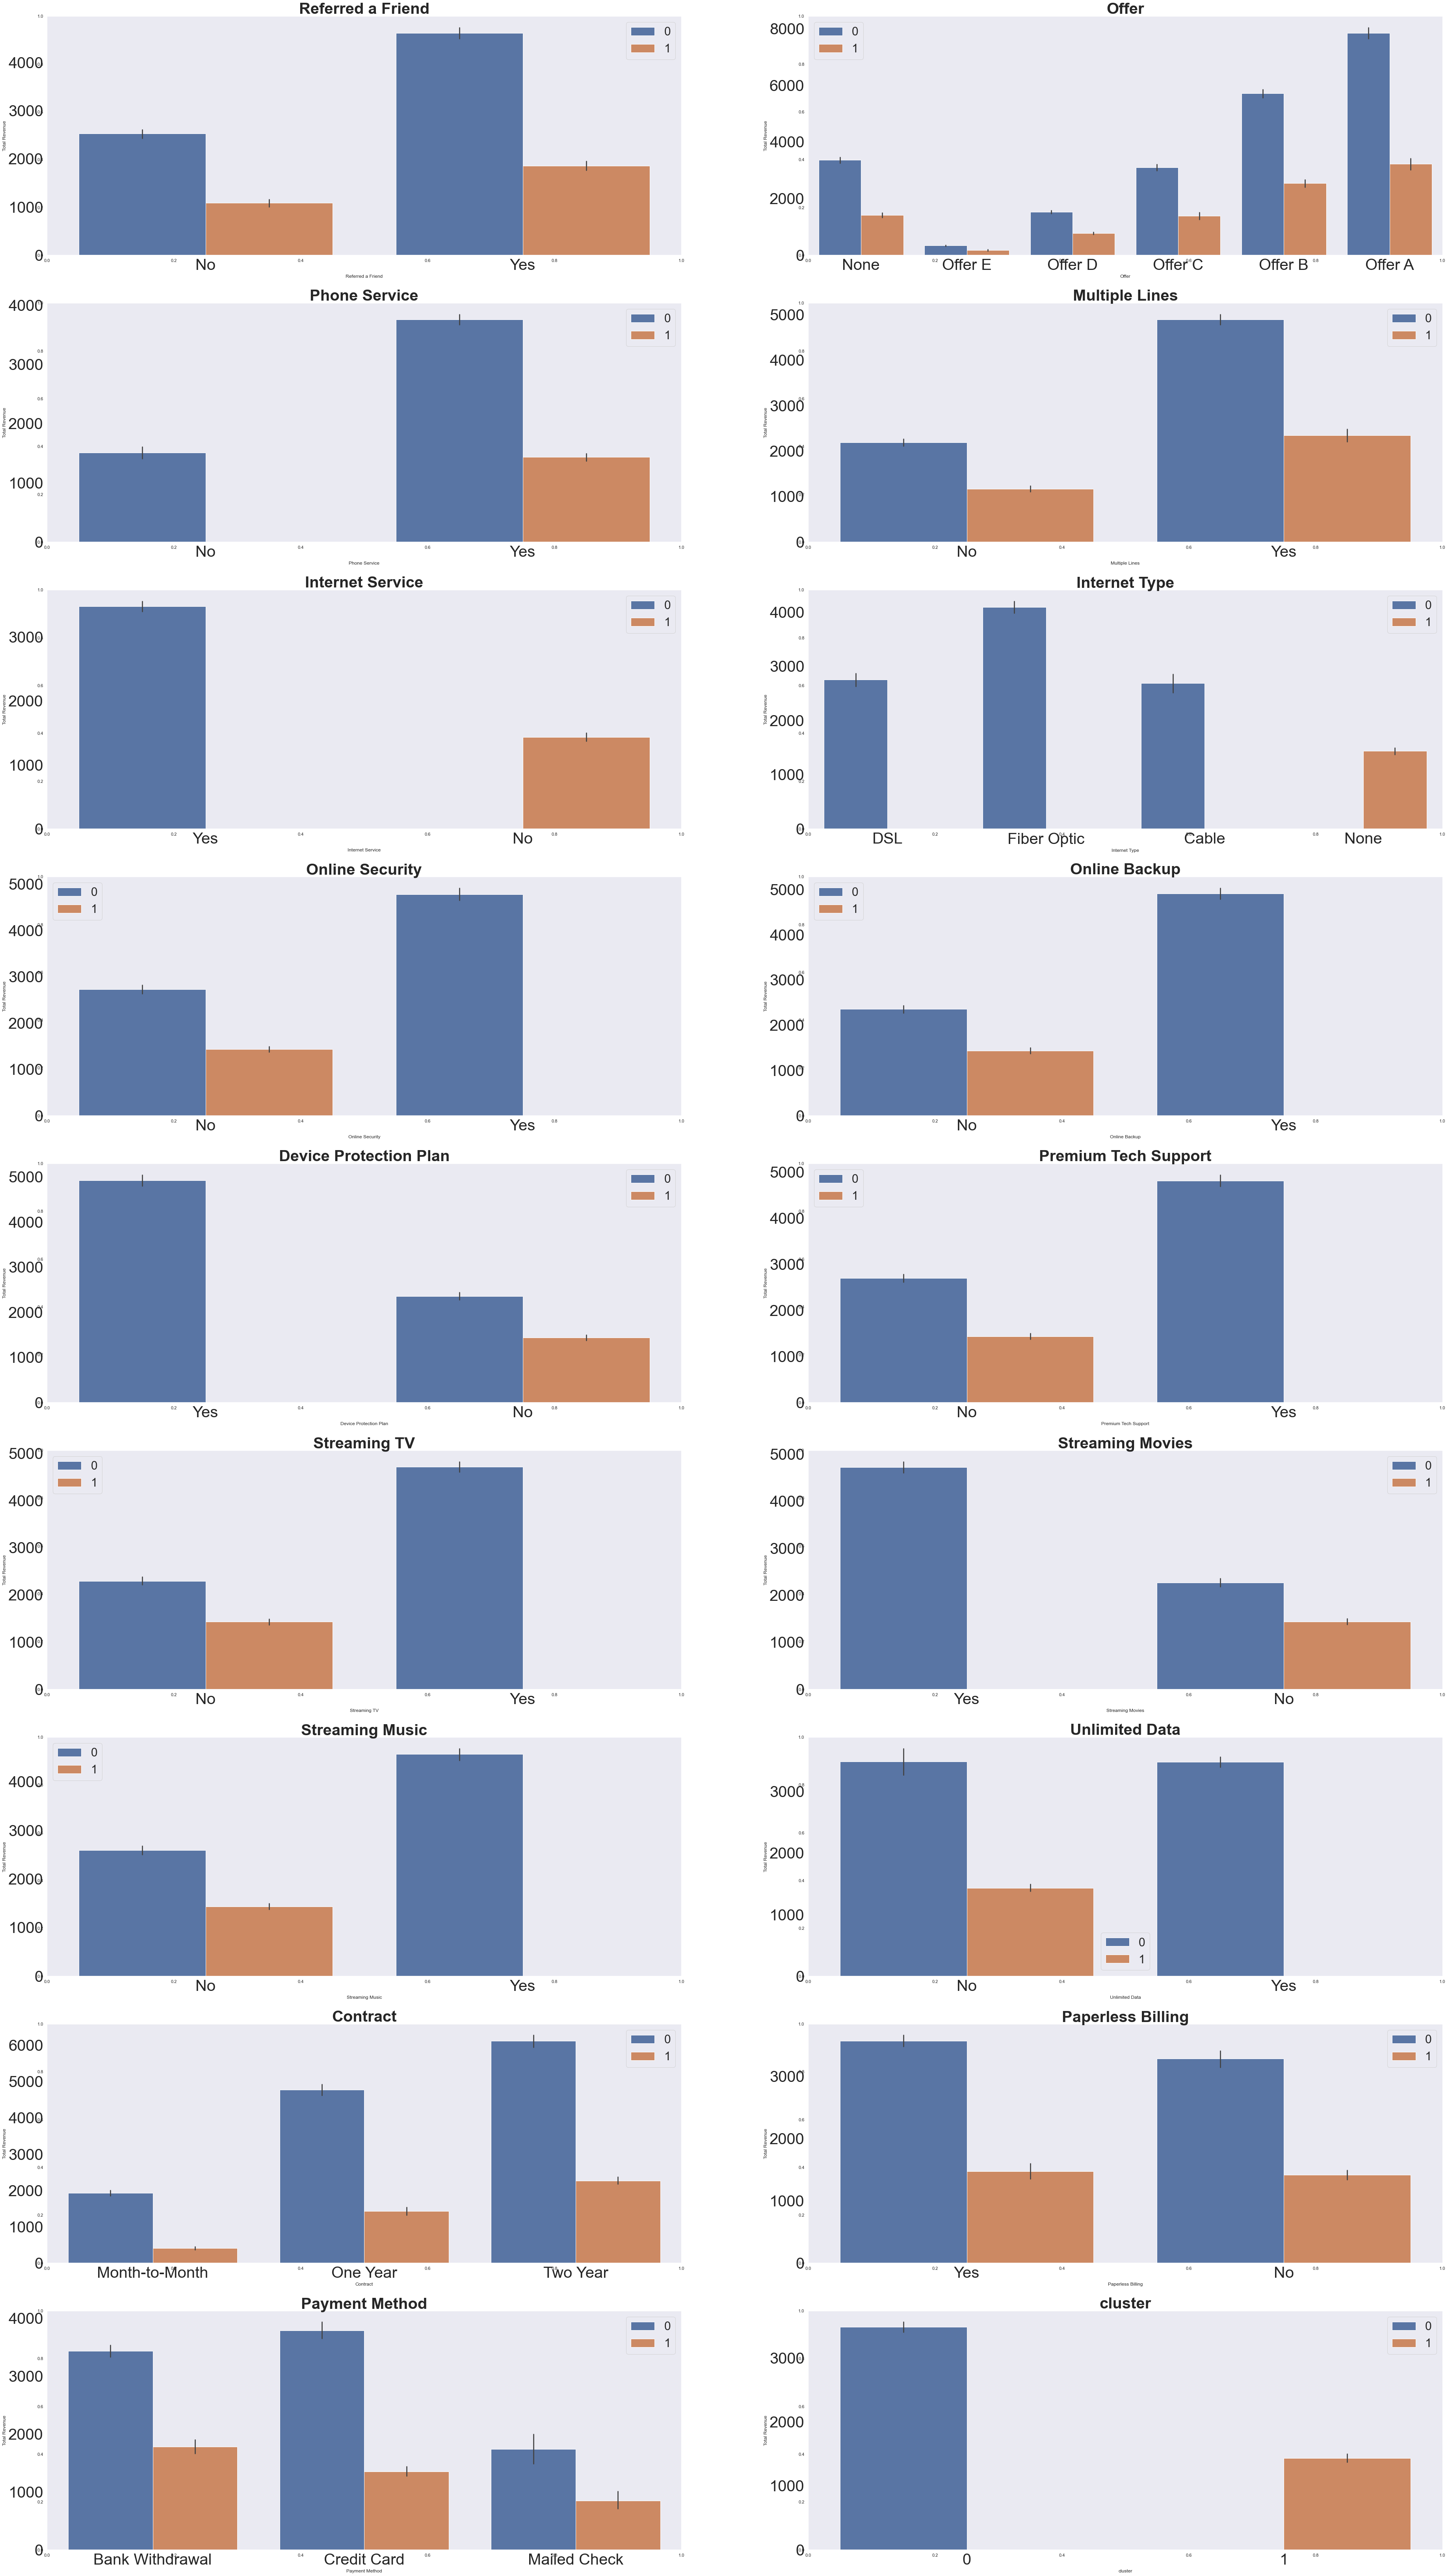

In [75]:
fig, axes = plt.subplots(9, 2, sharex=False, figsize=(50,90))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
j=0

for col in telco1_cat.columns:
    ax = fig.add_subplot(9, 2, nfig[j])
    #p=stats.probplot(telco1_num[col], dist="norm", plot=ax)
    #p=sns.histplot(data=telco1_cat, x=col)
    ax = sns.barplot(x=col, y='Total Revenue', hue="cluster", data=telco)
    ax.set_title(col,fontweight="bold", size=40)
    ax.tick_params(labelsize=40)
    ax.legend(fontsize=30)
    fig.subplots_adjust(wspace=0.2)
    fig.subplots_adjust(hspace=0.2)
    j= j+1

In [76]:
telco1_cat.shape

(7043, 18)

* Cluster 1 has no online security and device protection plan. The company could offer security packages and device protection plans to these customers.  
* Cluster 1 has no online premium tech support. The company could offer premium tech support to these customers.  
* Target movie streaming,TV and music once the  data plans are bought by cluster 1 customers.  
* Provide unlimited data and once the  data plans are bought by cluster 1 customers.  
* Provide offers for credit card payment to cluster 1 customers.  